In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [6]:
data = fetch_california_housing(as_frame = True)
housing = data.frame

In [7]:
print(housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [10]:
numerical_feature = housing.select_dtypes(include = [np.number]).columns
print(f"numerical_features : {list(numerical_feature)}")

numerical_features : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [12]:
n_features = len(numerical_feature)
n_col = 3
n_rows = n_features//3+1

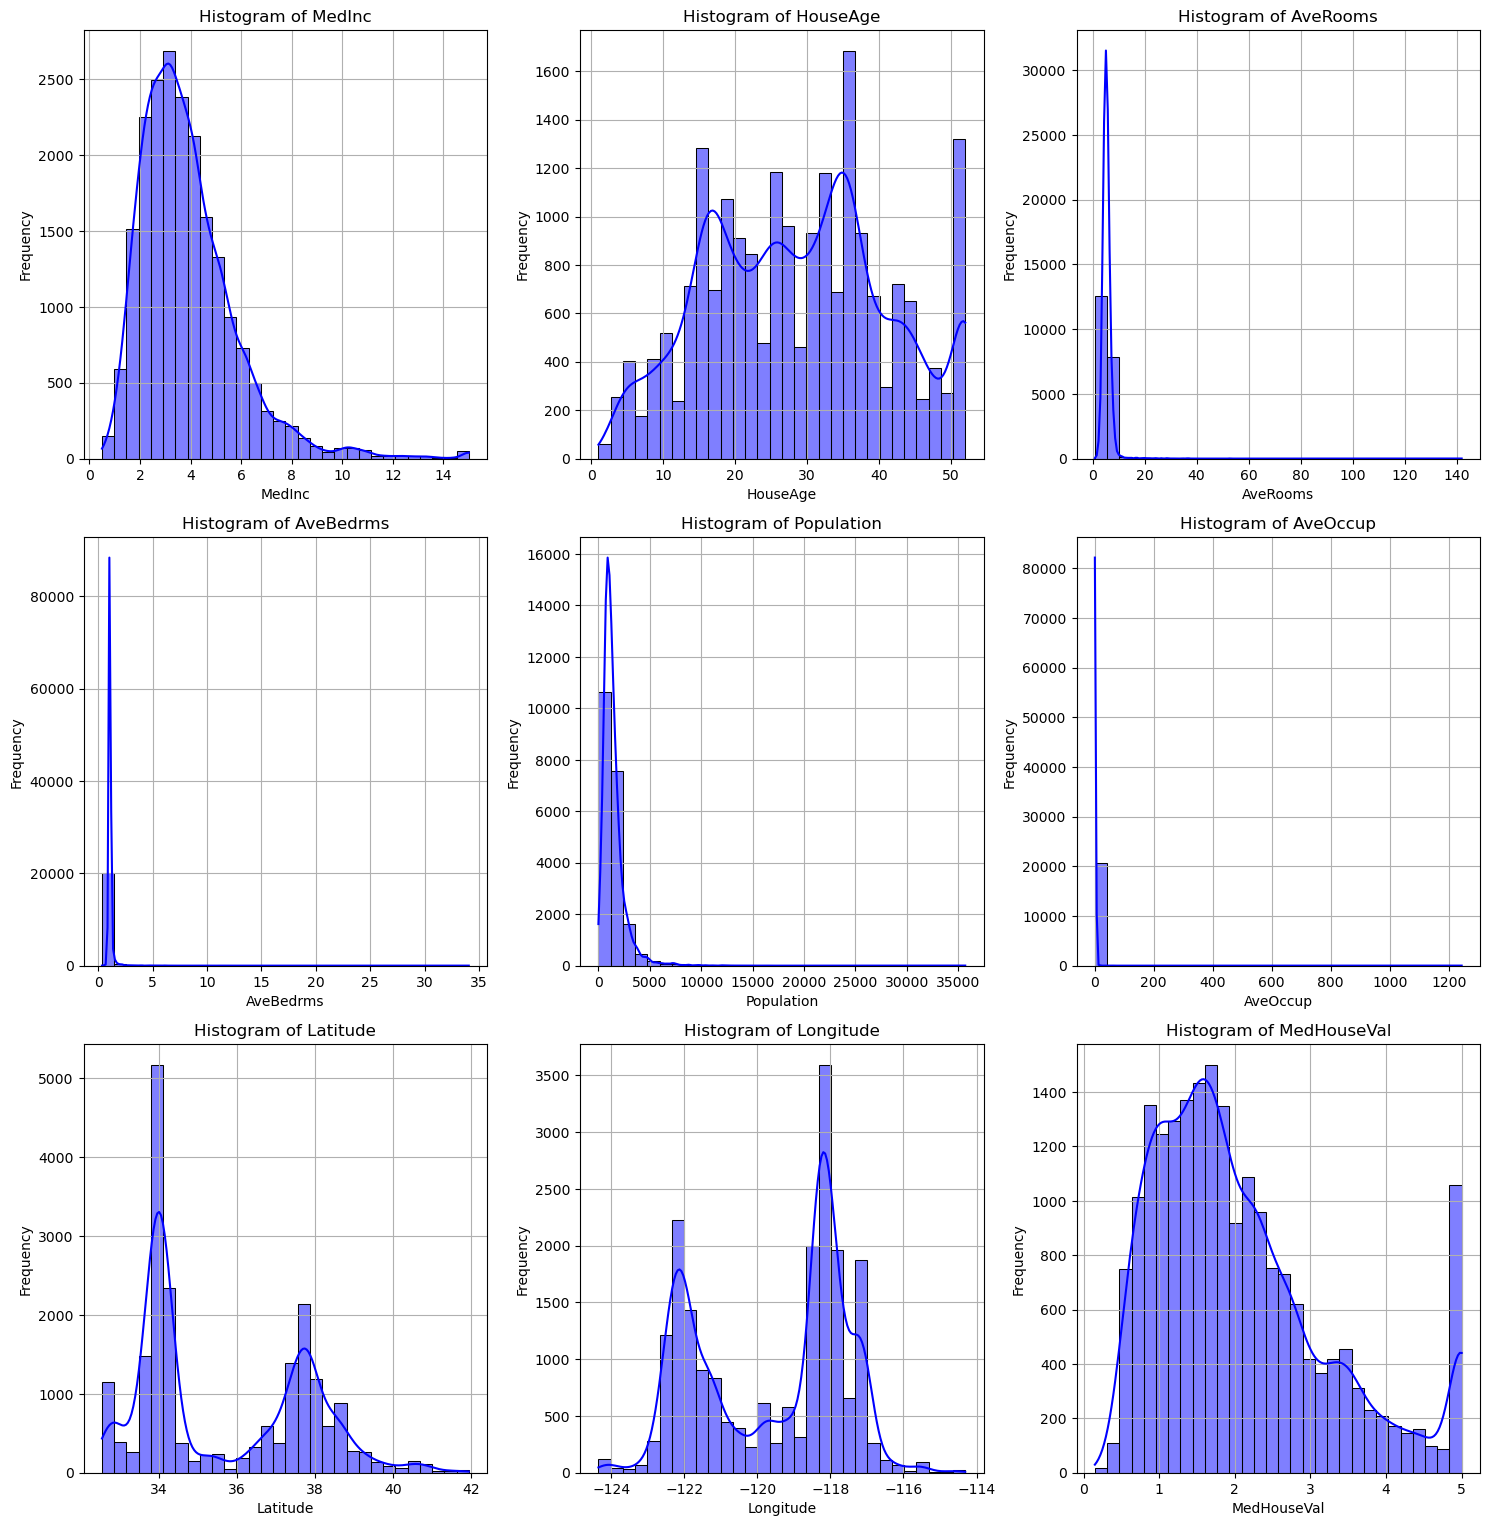

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [17]:
plt.figure(figsize = (15 , 5*n_rows))
for i , feature in enumerate(numerical_feature):
    plt.subplot(n_rows,n_col,i+1)
    sn.histplot(housing[feature] , kde = True , bins = 30 , color = 'blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
plt.tight_layout()
plt.show()
print(housing.describe)

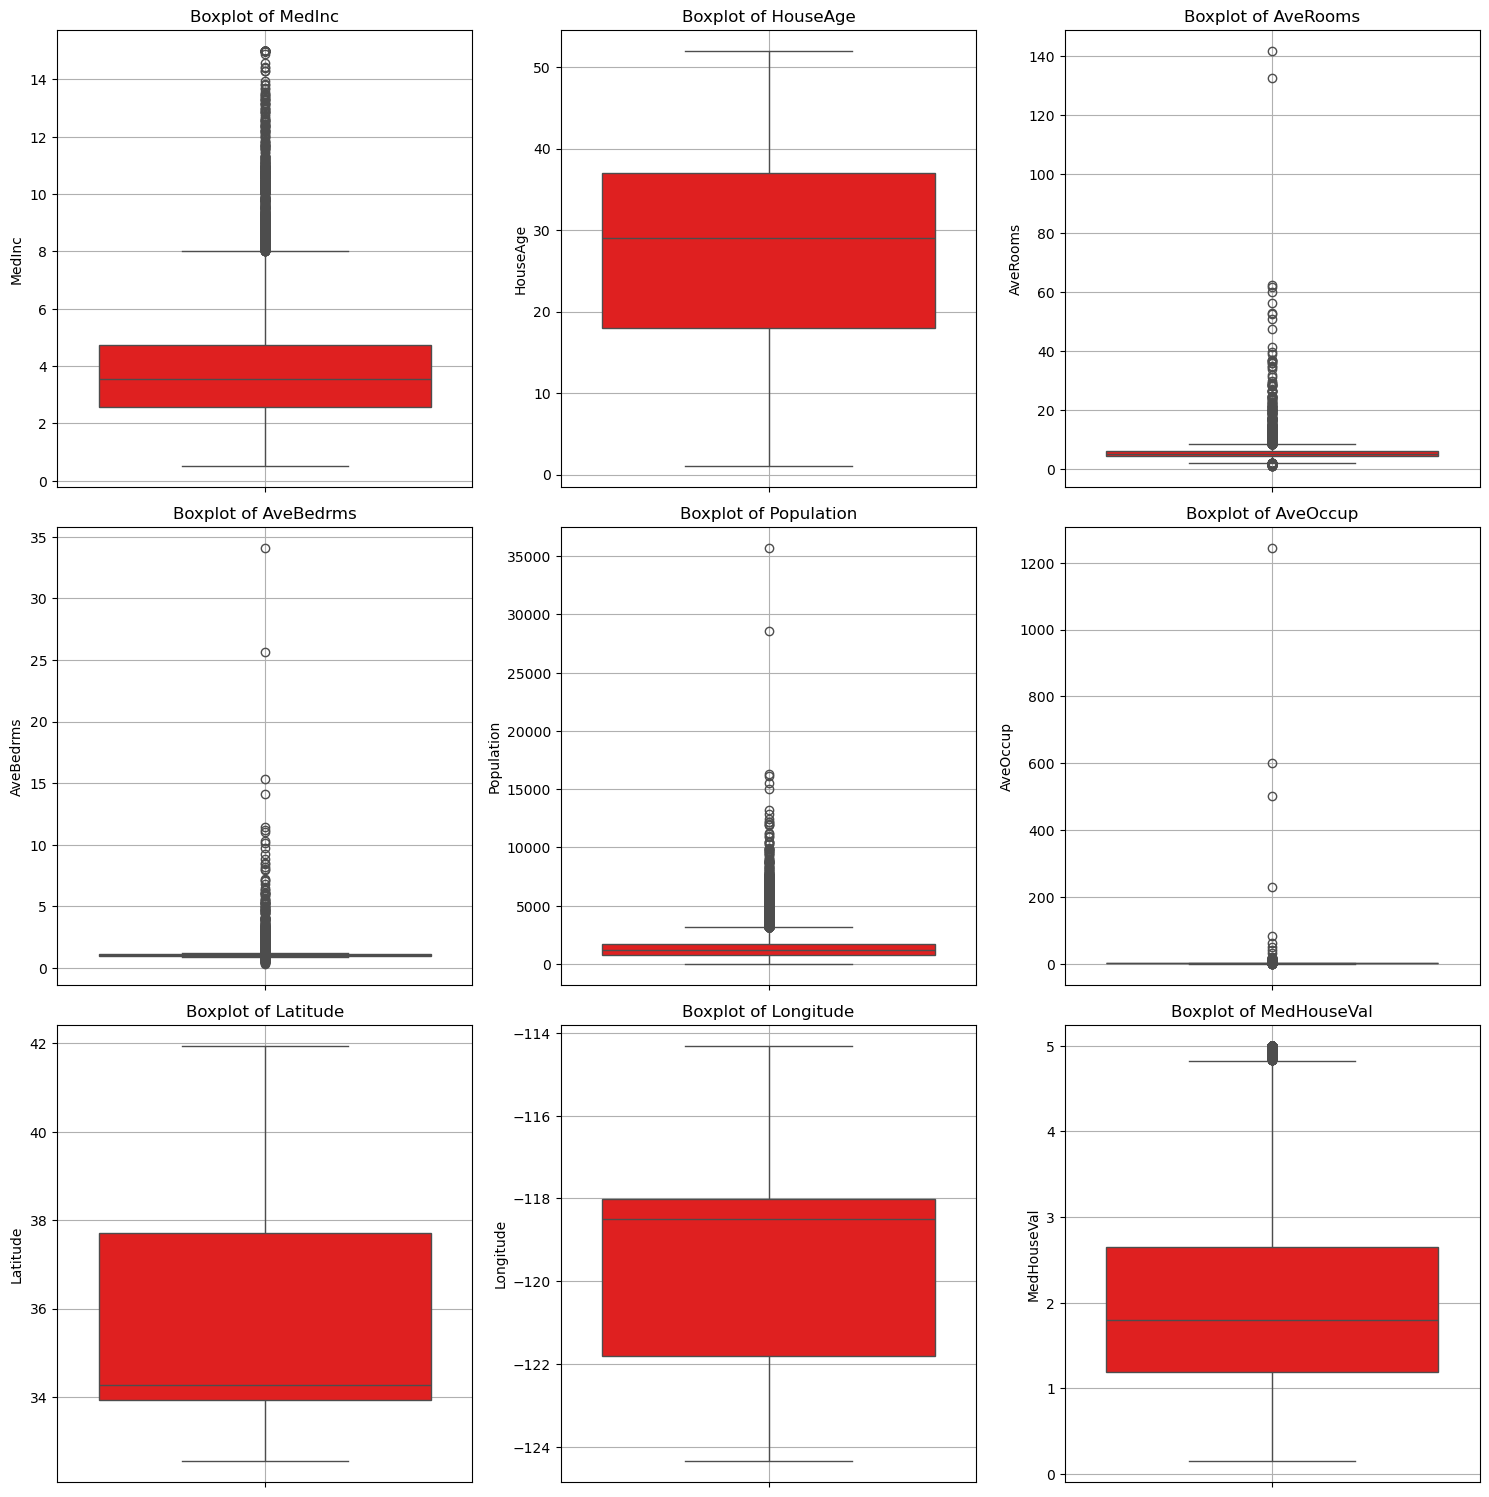

In [19]:
plt.figure(figsize = (15 , 5*n_rows))
for i , feature in enumerate(numerical_feature):
    plt.subplot(n_rows,n_col,i+1)
    sn.boxplot(housing[feature] , color = 'Red')
    plt.title(f"Boxplot of {feature}")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("Outliers Detection")
outliers_summary = {}
for feature in numerical_feature:
    Q1 = housing[feature].quantile(0.25)
    Q3 = housing[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing[(housing[feature] < lower_bound) | (housing[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature} : {len(outliers)} outliers")

Outliers Detection
MedInc : 681 outliers
HouseAge : 0 outliers
AveRooms : 511 outliers
AveBedrms : 1424 outliers
Population : 1196 outliers
AveOccup : 711 outliers
Latitude : 0 outliers
Longitude : 0 outliers
MedHouseVal : 1071 outliers
